# Принятие решений в бизнесе на основе данных

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Необходимо приоритезировать гипотезы по увеличению выручки интернет-магазина, запустить A/B-тест и проанализировать результаты.

**Гипотезы исследования**:

- существует статистическая значимость различий в конверсии между группами по "сырым" данным;
- существует статистическая значимость различий в средних чеках между группами по "сырым" данным;
- существует статистическая значимость различий в конверсии между группами по "очищенным" данным;
- существует статистическая значимость различий в средних чеках между группами по "очищенным" данным.

**Этапы исследования:**

1. Обзор данных
2. Предварительная обработка данны
3. Приоритезация гипотез по увеличению выручки интернет-магазина
4. Анализ А/В-теста
5. Проверка гипотез
6. Вывод и рекомендации

<a name="h1"></a>
### 1. Обзор данных

#### Импорт библиотек

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import scipy.stats as stats

#### Настройка

In [2]:
#отображение данных до двух знаков после запятой
pd.set_option('display.precision', 2)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Анализ файлов

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

##### Гипотезы

In [4]:
hypothesis.head(3)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


##### Заказы

In [6]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


##### Посетители

In [8]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод**  
Представлены данные о 9 гипотезах для увеличения выручки с оценками по каждому из 4 параметров: reach, impact, confidence, efforts.  
Также имеются данные о посетителях и заказах, совершенных на сайте интернет-магазина в августе 2019 года.  
Для исследования нам необходимо подготовить данные:  
- преобразовать названия столбцов (привести к нижнему регистру и переименовать по необходимости);
- изменить тип данных в датах;
- убедиться в отсутствии дубликатов.

<a name="h2"></a>
### 2. Предварительная обработка данных

#### Преобразование названий столбцов

Чтобы привести к нижнему регистру названия и переименовать столбцы воспользуемся атрибутом columns.

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()

In [11]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [12]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

#### Изменение типа данных

Применим *pd.to_datetime* для изменения типа данных в столбцах с датами.

In [13]:
visitors.sample(1)
orders.sample(1)

,date,group,visitors
7,2019-08-08,A,610


,transaction_id,visitor_id,date,revenue,group
486,752294429,2758621772,2019-08-19,1130,B


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d")

In [15]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")

#### Проверка дубликатов

Проверим, что в заказах нет дублирующихся строчек

In [16]:
orders['transaction_id'].duplicated().sum()

0

<a name="h3"></a>
### 3. Приоритезация гипотез по увеличению выручки интернет-магазина

Применим фреймворк **ICE** для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [17]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [18]:
hypothesis['ice_rank'] = hypothesis['ice'].rank(ascending=False)

In [19]:
hypothesis.sort_values('ice_rank')

,hypothesis,reach,impact,confidence,efforts,ice,ice_rank
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,1.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,2.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,3.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,5.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,6.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,7.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,8.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,9.0


Применим фреймворк **RICE** для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [20]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [21]:
hypothesis['rice_rank'] = hypothesis['rice'].rank(method='first', ascending=False)

In [22]:
hypothesis.sort_values('rice_rank')

,hypothesis,reach,impact,confidence,efforts,ice,ice_rank,rice,rice_rank
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,3.0,112.0,1.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,5.0,56.0,2.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,2.0,40.0,3.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,4.0,40.0,4.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,1.0,16.2,5.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,8.0,9.0,6.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,6.0,4.0,7.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,7.0,4.0,8.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,9.0,3.0,9.0


Добавим столбец `diff`, в котором отразим изменение приоритезации гипотез.

In [23]:
hypothesis['diff'] = hypothesis['rice_rank'] - hypothesis['ice_rank']

In [24]:
hypothesis.sort_values('reach')

,hypothesis,reach,impact,confidence,efforts,ice,ice_rank,rice,rice_rank,diff
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,1.0,16.2,5.0,4.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,6.0,4.0,7.0,1.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,2.0,40.0,3.0,1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,9.0,3.0,9.0,0.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,7.0,4.0,8.0,1.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,4.0,40.0,4.0,0.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,5.0,56.0,2.0,-3.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,8.0,9.0,6.0,-2.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,3.0,112.0,1.0,-2.0


Параметр reach оценивает охват пользователей, которых затронет изменение. Больший показатель придает больший приоритет и значимость гипотезе. По столбцам `reach` и `diff` видно, что чем больше значение этого показателя, тем выше поднимается гипотеза в рейтинге, и наоборот, маленький охват понижает ценность изменений.

Определим средний рейтинг гипотез в колонке `mean_rank`, приняв способы приоритезации **ICE** и **RICE** как равноценные, и отсортируем гипотезы по его значению.

In [25]:
hypothesis['mean_rank'] = (hypothesis['rice_rank'] + hypothesis['ice_rank']) / 2

In [26]:
hypothesis.sort_values('mean_rank')

,hypothesis,reach,impact,confidence,efforts,ice,ice_rank,rice,rice_rank,diff,mean_rank
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,3.0,112.0,1.0,-2.0,2.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,2.0,40.0,3.0,1.0,2.5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,1.0,16.2,5.0,4.0,3.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,5.0,56.0,2.0,-3.0,3.5
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,4.0,40.0,4.0,0.0,4.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,6.0,4.0,7.0,1.0,6.5
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,8.0,9.0,6.0,-2.0,7.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,7.0,4.0,8.0,1.0,7.5
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,9.0,3.0,9.0,0.0,9.0


Выведем топ-3 гипотез с наибольшим средним рейтингом.

In [27]:
hypothesis.loc[7,'hypothesis']
hypothesis.loc[0,'hypothesis']
hypothesis.loc[8,'hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

'Запустить акцию, дающую скидку на товар в день рождения'

<a name="h4"></a>
### 4. Анализ А/В-теста

Создадим массив уникальных пар значений дат и групп теста методом *drop_duplicates()*.

In [28]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий:  
1. Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`.
2. Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец `group` не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму выручки.
3. Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам `date` и `group`.

In [29]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transaction_id' : pd.Series.nunique, 
      'visitor_id' : pd.Series.nunique, 
      'revenue' : 'sum'}), axis=1
                                    ).sort_values(by=['date','group'])

In [30]:
ordersAggregated.head(3)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401


Получили кумулятивные данные по выручке в разрезе групп на каждую дату транзакций. Аналогично получим агрегированные кумулятивные по дням данные о количестве посетителей интернет-магазина.

In [31]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group'])

In [32]:
visitorsAggregated.head(3)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338


Объединим обе таблицы в одну с понятными названиями столбцов.

In [33]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [34]:
cumulativeData.head(3)

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338


In [35]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим **график кумулятивной выручки по дням и группам A/B-тестирования**.

In [36]:
#датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


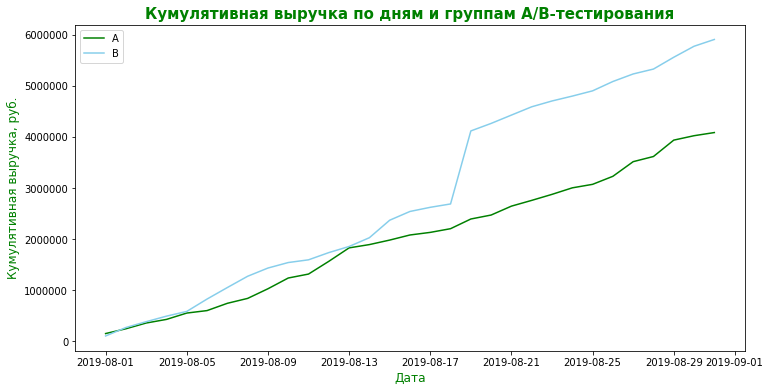

In [37]:
plt.figure(figsize=(12,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='green')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='skyblue')

plt.title("Кумулятивная выручка по дням и группам A/B-тестирования", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500,color='green')
plt.ylabel('Кумулятивная выручка, руб.', fontsize = 12, fontweight=500,color='green')
plt.legend();

Выручка *группы А* равномерно увеличивается в течение всего теста. Однако график выручки *группы В* в одной точке резко растет, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

Построим **график среднего чека по группам**, разделив кумулятивную выручку на кумулятивное число заказов.

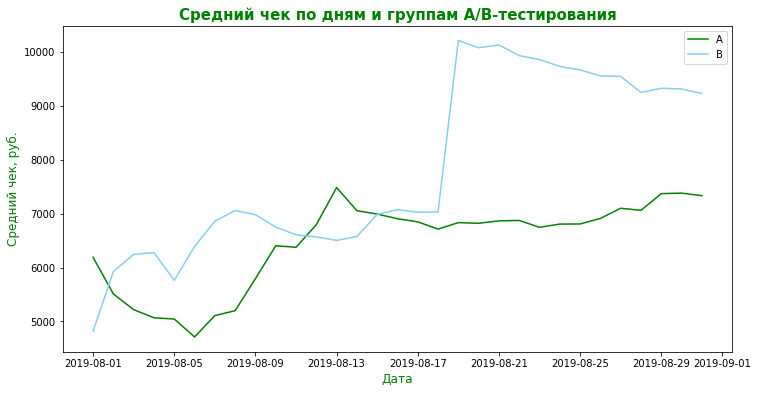

In [38]:
plt.figure(figsize=(12,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='green')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='skyblue')

plt.title("Средний чек по дням и группам A/B-тестирования", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500,color='green')
plt.ylabel('Средний чек, руб.', fontsize = 12, fontweight=500,color='green')

plt.legend();

Средний чек становится более равномерным ближе к концу теста: установился для *группы A*, но продолжает падать для *группы B* после внезапного роста. Вероятно во вторую группу в середине теста попали крупные заказы (резкий всплеск на обоих графиках 2019-08-19), поэтому *группе В* нужно больше времени и данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим **график относительного различия для среднего чека**.

In [39]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

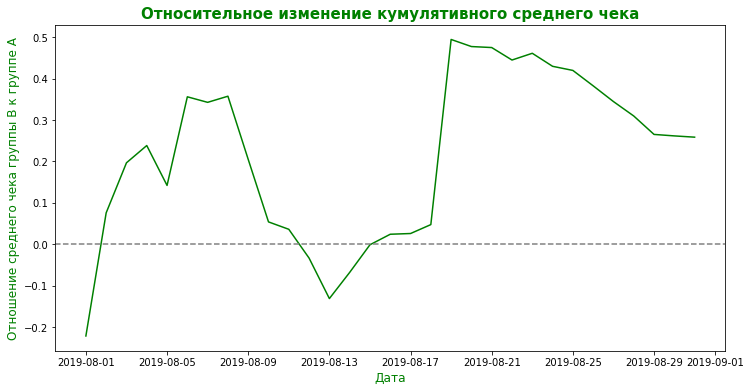

In [40]:
plt.figure(figsize=(12,6))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='green')

plt.axhline(y=0, color='grey', linestyle='--')

plt.title("Относительное изменение кумулятивного среднего чека", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500,color='green')
plt.ylabel('Отношение среднего чека группы В к группе А', fontsize = 12, fontweight=500,color='green');

В нескольких точках график различия между сегментами резко «скачет». Данные явно содержат крупные заказы и выбросы.

Проанализируем **график кумулятивной конверсии**.

In [41]:
#считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе A и В
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

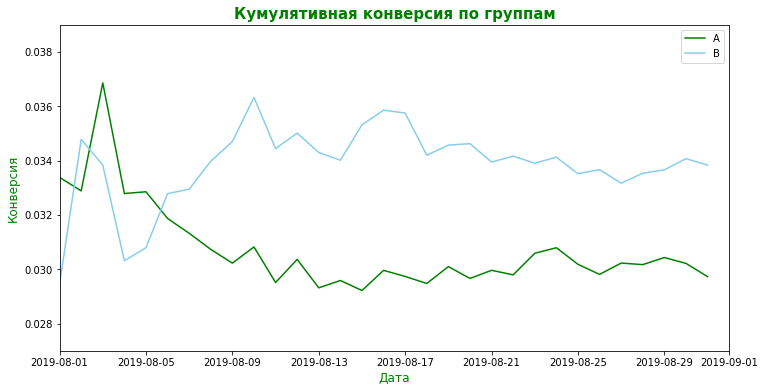

In [42]:
plt.figure(figsize=(12,6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='green')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='skyblue')

plt.axis(["2019-08-01", '2019-09-01', 0.027, 0.039])

plt.title("Кумулятивная конверсия по группам", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500, color='green')
plt.ylabel('Конверсия', fontsize = 12, fontweight=500, color='green')
plt.legend();

В целом кумулятивные конверсии по группам ещё не зафиксировались, но прослеживается преобладание показателей *группы В* над показателями *группы А*.

Построим **график относительного различия кумулятивных конверсий группы B к группе A**.

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

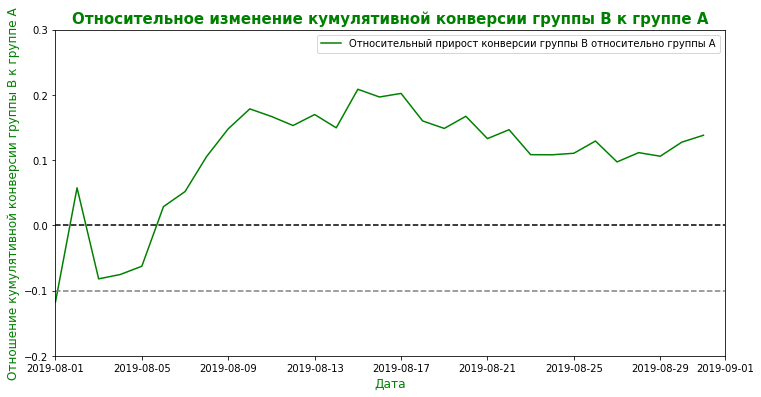

In [44]:
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A", color='green')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])

plt.title("Относительное изменение кумулятивной конверсии группы B к группе A", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500, color='green')
plt.ylabel('Отношение кумулятивной конверсии группы В к группе А', fontsize = 12, fontweight=500, color='green')
plt.legend();

Показатели конверсии *группы В*, не считая первых дней исследования, стабильно лучше, чем у *группы А*, однако в целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Необходимо проанализировать аномальные значения, которые могут повлиять на картину.

Построим **точечный график количества заказов по пользователям** в разрезе групп, подсчитав количество заказов по каждому покупателю.

In [45]:
#сгруппируем заказы по пользователем и группам
ordersByVisitors = orders.drop(['revenue', 'date'], axis=1).groupby(
    'visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique, 'group' : 'first'})

In [46]:
ordersByVisitors.columns = ['visitor_id', 'orders', 'group']

In [47]:
ordersByVisitorsA = ordersByVisitors[ordersByVisitors['group'] == 'A']
ordersByVisitorsB = ordersByVisitors[ordersByVisitors['group'] == 'B']

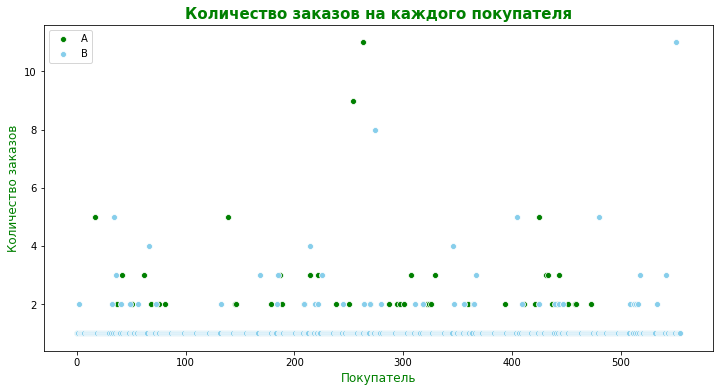

In [48]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=range(0,len(ordersByVisitorsA['orders'])),y=ordersByVisitorsA['orders'], label='A', color='green')
sns.scatterplot(x=range(0,len(ordersByVisitorsB['orders'])),y=ordersByVisitorsB['orders'], label='B', color='skyblue')

plt.title("Количество заказов на каждого покупателя", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Покупатель", fontsize = 12, fontweight=500, color='green')
plt.ylabel('Количество заказов', fontsize = 12, fontweight=500, color='green')
plt.legend();

Большинство покупателей ограничились только одним заказом, однако не так уж редко пользователи делали и повторные покупки. Для того чтобы точно определить какое количество заказов можно считать "нормальным", а какое отклонением, посчитаем выборочные перцентили количества заказов на одного пользователя.

In [49]:
np.percentile(ordersByVisitors['orders'], [95, 99])
#справочно рассмотрим показатель в разрезе групп
np.percentile(ordersByVisitorsA['orders'], [95, 99])
np.percentile(ordersByVisitorsB['orders'], [95, 99])

array([2., 4.])

array([2.  , 3.52])

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа. И только 1% пользователей заказывали более четырех раз. При этом *группа В* склонна делать повторные заказы чуть чаще. Чтобы сохранить это отличие между группами, выберем 99% перцентиль за границу числа заказов, и отсеим аномальных пользователей по ней.

Построим точечный **график стоимости заказов по пользователям в разрезе групп**, разделив таблицу с данными по заказам на группы А/В-теста.

In [50]:
ordersA = orders[orders['group']=='A']
ordersB = orders[orders['group']=='B']

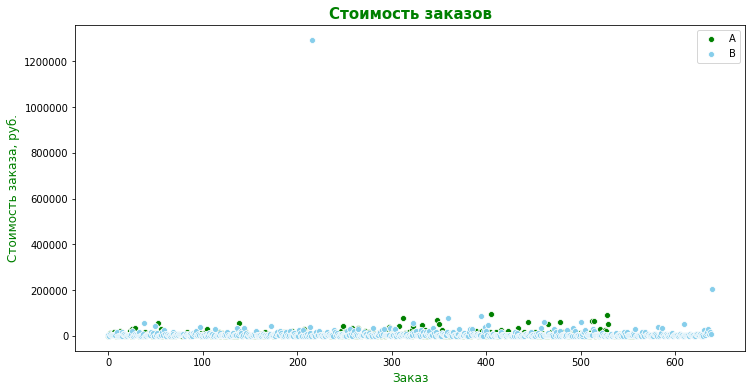

In [51]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=range(0,len(ordersA['revenue'])),y=ordersA['revenue'], color='green', label='A')
sns.scatterplot(x=range(0,len(ordersB['revenue'])),y=ordersB['revenue'], color='skyblue', label='B')

plt.title("Стоимость заказов", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Заказ", fontsize = 12, fontweight=500, color='green')
plt.ylabel('Стоимость заказа, руб.', fontsize = 12, fontweight=500, color='green')
plt.legend();

На графике бросаются в глаза два самых больших выброса и оба они принадлежат *группе В*. Скорее всего, именно первый выброс причина резкого роста среднего чека и кумулятивной выручки *группы В* 2019-08-19. Для более точной оценки аномальной стоимости заказов, посчитаем выборочные перцентили стоимости заказов на одного пользователя.

In [52]:
np.percentile(orders['revenue'], [95, 99])
#справочно рассмотрим показатель в разрезе групп
np.percentile(ordersA['revenue'], [95, 99])
np.percentile(ordersB['revenue'], [95, 99])

array([28000. , 58233.2])

array([26718. , 62764.4])

array([28787.45, 55579.06])

При сравнении показателя в разрезе групп видно, что покупки *группы А* более разнообразны по цене. В качестве отсечки снова возьмем 99% перцентиль, поскольку 95% перцентиль по *группе В* находится выше, чем в целом по выборке.

<a name="h5"></a>
### 5. Проверка гипотез

Посчитаем **статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным** — без удаления аномальных пользователей.

#### Гипотеза 1: существует статистическая значимость различий в конверсии между группами по "сырым" данным

*Нулевая гипотеза H₀:* конверсии *группы А* и *группы В* равны.  
*Альтернативная гипотеза H₁:* конверсии *группы А* и *группы В* различаются.

Для начала подготовим данные:

In [53]:
#по каждой группе сформируем таблицу: дата-количество посетителей
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [54]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [55]:
#на каждую дату рассчитаем кумулятивное количество посетителей
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [56]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [57]:
#по каждой группе сформируем таблицу: дата-количество транзакций-количество заказчиков - выручка
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [58]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [59]:
#на каждую дату рассчитаем кумулятивные значения количества транзакций, заказчиков и суммы выручки
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [60]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [61]:
#объединим все данные в одну таблицу по датам
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [62]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь можно приступать к анализу. Посчитаем **статистическую значимость различия в конверсии между группами по "сырым" данным**.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [63]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [64]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

Число элементов в `sampleA` и `sampleВ` — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке методом *mean()*.

In [65]:
alpha = .05 

results = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-значение:', "{0:.3f}".format(results))
if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительный прирост конверсии группы В:", "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.008
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы В: 0.138


**Вывод:** По «сырым» данным различия в конверсии *групп A* и *B* есть, при этом конверсия *группы B* выше, чем у *группы А* на 13.8%.

#### Гипотеза 2: существует статистическая значимость различий в средних чеках между группами по "сырым" данным

*Нулевая гипотеза H₀:* средние чеки *группы А* и *группы В* равны.  
*Альтернативная гипотеза H₁:* средние чеки *группы А* и *группы В* различаются.

In [66]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('p-значение:', "{0:.3f}".format(results))
if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительный прирост среднего чека группы В:", "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()
                                                                    /orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.365
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы В: 0.259


**Вывод:** По «сырым» данным различий в величине средних чеков *групп A* и *B* нет, при этом средний чек *группы B* выше, чем у *группы А* на 25,9%. Скорее всего, это вызвано двумя самыми дорогими заказами за рассматриваемый период, оба которых попали в *группу В*.

#### Гипотеза 3: существует статистическая значимость различий в конверсии между группами по "очищенным" данным

*Нулевая гипотеза H₀:* конверсии *группы А* и *группы В* равны.  
*Альтернативная гипотеза H₁:* конверсии *группы А* и *группы В* различаются.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58 233,2 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 58 233,2 рублей — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

In [67]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
(15,)


Всего 15 аномальных пользователей.  

Объявим переменные `sampleAFiltered` и `sampleBFiltered`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [68]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

In [69]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p-значение:', "{0:.3f}".format(results))
if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительный прирост конверсии группы В:", "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.007
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы В: 0.153


**Вывод**: Полученные по "очищенным" данным результаты практически не отличаются от «сырых». Конверсии *групп A* и *B* различаются, при этом конверсия группы B выше, чем у группы А на 15.3%.

#### Гипотеза 4: существует статистическая значимость различий в средних чеках между группами по "очищенным" данным

*Нулевая гипотеза H₀:* средние чеки *группы А* и *группы В* равны.  
*Альтернативная гипотеза H₁:* средние чеки *группы А* и *группы В* различаются.

In [70]:
results = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]

print('p-значение:', "{0:.3f}".format(results))
if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительный прирост среднего чека группы В:", "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение: 0.425
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы В: -0.006


**Вывод**: По «очищенным» данным различий в величине средних чеков *групп A* и *B* также нет, при этом средний чек *группы B* лишь на 0,6% ниже, чем у *группы А*. Таким образом, превышение среднего чека *группы В* по "сырым" данным было обусловлено только аномально дорогим заказами.

### Вывод и рекомендации

- Существует статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий, при этом конверсия *группы В* на 13,8% выше, чем у *группы А* по "сырым" данным и на 15,3% по "очищенным";
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты *группы B* стабильно лучше *группы A* и нет предпосылок к существенному изменению тенденции:

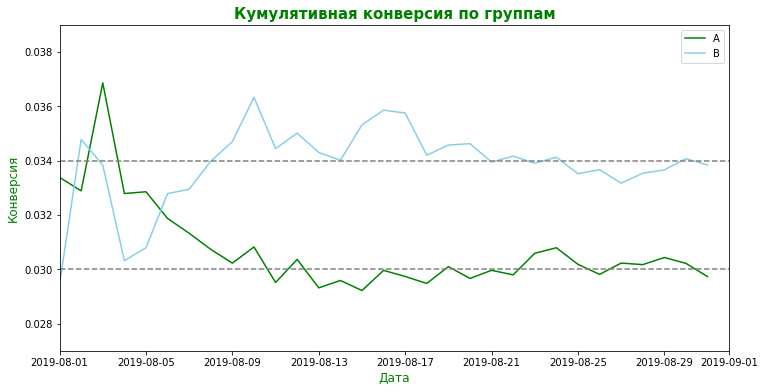

In [71]:
plt.figure(figsize=(12,6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='green')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='skyblue')

plt.axis(["2019-08-01", '2019-09-01', 0.027, 0.039])
plt.axhline(y=0.034, color='grey', linestyle='--')
plt.axhline(y=0.03, color='grey', linestyle='--')

plt.title("Кумулятивная конверсия по группам", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Дата", fontsize = 12, fontweight=500, color='green')
plt.ylabel('Конверсия', fontsize = 12, fontweight=500, color='green')
plt.legend();

- средний чек *группы В* по "очищенным" данным лишь на 0,06% меньше аналогичного показателя *группы А*.  

Исходя из обнаруженных фактов, тест можно остановить. Несмотря на практически равные средние чеки, конверсия *группы В* на 15% лучше, чем у *группы А*, при этом выше мы определили, что *группа В* склонна чуть чаще делать повторные заказы, что делает сегмент В более эффективным.